In [1]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = '/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar'
spike_times = np.load(data_path+'/'+'spikes.times.npy') * 1000 # Unbinned spike times in ms
clusters_annotation = np.load(data_path+'/'+'clusters._phy_annotation.npy')
spike_clusters = np.load(data_path+'/'+'spikes.clusters.npy')

In [4]:
def sort_into_cells(spike_times,clusters_annotation,spike_clusters):
    spike_time_cells = np.empty(len(clusters_annotation), dtype=object) # Initalise empty object
    for i in (np.arange(len(np.unique(spike_clusters)))):
      # Create a spike time arrays, where each array in the array is a spike time of a cell
      spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]
    return spike_time_cells

In [5]:
spike_time_cells=sort_into_cells(spike_times,clusters_annotation,spike_clusters)

In [17]:
print(spike_time_cells[0])

[[1.50146667e+03]
 [2.12953333e+03]
 [2.31823333e+03]
 ...
 [2.96655043e+06]
 [2.96662953e+06]
 [2.96669323e+06]]


In [6]:
def for_spike_generator(spike_time_cells):
    spikes=[]
    cell_identity=[]
    for cell_ind in range(spike_time_cells.shape[0]):
        for spike in list(spike_time_cells[cell_ind].flatten()):
            spikes.append(spike*ms)
            cell_identity.append(cell_ind)
    inds=np.argsort(spikes)
    spikes=np.array(spikes)[inds][:1000]
    cell_identity=np.array(cell_identity)[inds][:1000]
    return spikes, cell_identity    

In [9]:
spikes, cell_identity=for_spike_generator(spike_time_cells)

In [21]:
print(spikes)
print(cell_identity)

[4.36666667e+00 5.20000000e+00 6.16666667e+00 ... 2.96827804e+06
 2.96827817e+06 2.96827947e+06]
[202 195  27 ... 443 488 402]


In [16]:
defaultclock.dt = 0.00005*ms
tau = 10*ms
vr = -70*mV
vt = -60*mV
eqs = '''
dv/dt = -v/tau : volt
'''
neuron = NeuronGroup(1, eqs, threshold='v>vt', reset='v=vr')
spikes_gen=SpikeGeneratorGroup(778,list(cell_identity),spikes*ms)
w = 1*mV
S = Synapses(spikes_gen, neuron, on_pre='v += w')
S.connect()
# Record the spikes
Mgp = SpikeMonitor(neuron)
Minput = SpikeMonitor(spikes_gen)
duration=spikes[-1]*ms
run(duration)

INFO       No numerical integration method specified for group 'neurongroup_6', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]


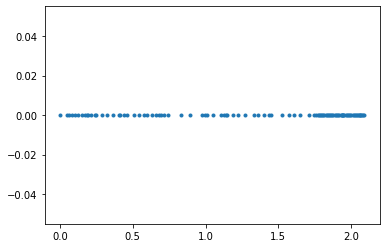

In [19]:
plot(Mgp.t/ms, Mgp.i, '.')